# seaborn.jointplot() 详细说明

`seaborn.jointplot()` 是 Seaborn 库中用于绘制双变量分布图的函数，它同时显示两个变量之间的散点图（或其它类型的双变量图）以及每个变量的单变量分布图（直方图或密度图）。

## 基本语法

```python
sns.jointplot(
    x=None,
    y=None,
    data=None,
    kind='scatter',
    color=None,
    height=6,
    ratio=5,
    space=0.2,
    dropna=False,
    xlim=None,
    ylim=None,
    marginal_ticks=False,
    joint_kws=None,
    marginal_kws=None,
    hue=None,
    palette=None,
    **kwargs
)
```

## 主要参数详解

### 基本参数

- **x, y**: 数据变量名（字符串），或者直接传入数据向量
- **data**: 数据框（DataFrame），当x和y是列名时使用
- **kind**: 指定联合图的类型，可选：
  - 'scatter' (默认): 散点图
  - 'kde': 核密度估计图
  - 'hist': 直方图
  - 'hex': 六边形分箱图
  - 'reg': 带回归线的散点图
  - 'resid': 回归残差图

### 外观参数

- **color**: 设置所有元素的颜色
- **height**: 主图的高度（英寸）
- **ratio**: 主图与边缘图的高度比例（默认为5）
- **space**: 主图与边缘图之间的间距
- **dropna**: 是否删除缺失值（默认为False）

### 范围参数

- **xlim, ylim**: 设置x轴和y轴的范围
- **marginal_ticks**: 是否在边缘图上显示刻度（默认为False）

### 高级参数

- **joint_kws**: 传递给主图的参数字典
- **marginal_kws**: 传递给边缘图的参数字典
- **hue**: 分组变量名，用于按类别着色
- **palette**: 调色板名称或字典，用于hue变量的颜色映射

## 返回值

返回一个 `JointGrid` 对象，可以通过该对象进一步自定义图形。

## 使用示例

### 基本散点图

```python
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
sns.jointplot(data=tips, x="total_bill", y="tip")
plt.show()
```

### 带核密度估计的联合图

```python
sns.jointplot(data=tips, x="total_bill", y="tip", kind="kde")
```

### 六边形分箱图

```python
sns.jointplot(data=tips, x="total_bill", y="tip", kind="hex")
```

### 带回归线的散点图

```python
sns.jointplot(data=tips, x="total_bill", y="tip", kind="reg")
```

### 分组着色

```python
sns.jointplot(data=tips, x="total_bill", y="tip", hue="smoker")
```

### 自定义图形

```python
g = sns.jointplot(data=tips, x="total_bill", y="tip")
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)
```

## 注意事项

1. 当数据量很大时，'scatter' 可能会显得拥挤，可以考虑使用 'hex' 或 'kde'
2. 可以通过返回的 JointGrid 对象进一步自定义图形
3. 使用 `hue` 参数时，边缘图会叠加显示不同类别的分布
4. 调整 `ratio` 和 `space` 可以优化图形的布局

`jointplot()` 是探索两个变量之间关系的强大工具，可以一次性展示双变量关系和各自的分布情况。

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

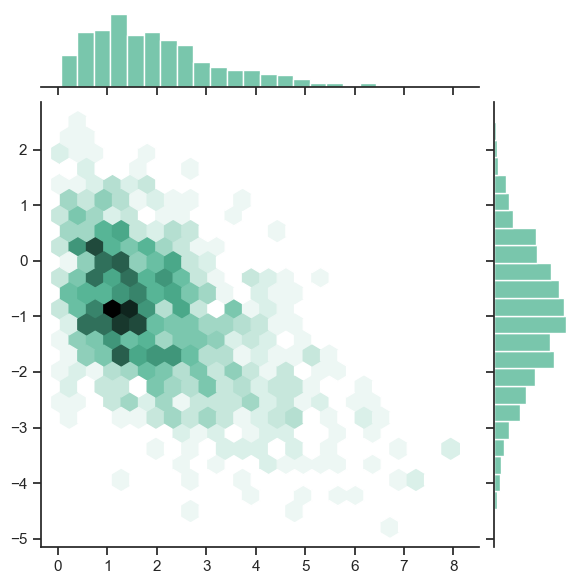

In [3]:
sns.set_theme(style="ticks")

rs = np.random.RandomState(11)      # 使用固定种子(11)确保每次运行代码生成的随机数相同，结果可复现
x = rs.gamma(2, size=1000)          # 从伽马分布生成1000个随机数作为x值
y = -.5 * x + rs.normal(size=1000)  # 创建与x有线性关系的y值：y = -0.5x + 噪声

sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")    # 设置图表颜色为指定的绿色十六进制值，这个颜色会应用于六边形图和边缘直方图

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
31,Adelie,Dream,37.2,18.1,178.0,3900.0,MALE
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
133,Adelie,Dream,37.5,18.5,199.0,4475.0,MALE
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,MALE
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE
290,Gentoo,Biscoe,47.7,15.0,216.0,4750.0,FEMALE
163,Chinstrap,Dream,51.7,20.3,194.0,3775.0,MALE
60,Adelie,Biscoe,35.7,16.9,185.0,3150.0,FEMALE
17,Adelie,Torgersen,42.5,20.7,197.0,4500.0,MALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


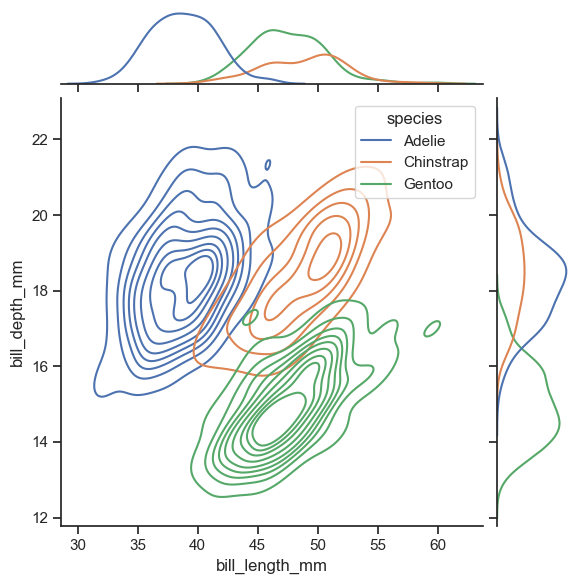

In [ ]:
sns.set_theme(style="ticks")
penguins = pd.read_csv("seaborn-data/penguins.csv")
display(penguins.sample(10))

# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=penguins,
    x="bill_length_mm", # 选择x轴变量 - 企鹅嘴峰长度(毫米)
    y="bill_depth_mm",  # 选择y轴变量 - 企鹅嘴峰深度(毫米)
    hue="species",      # 按企鹅种类进行颜色分组
    kind="kde",         # 使用核密度估计(Kernel Density Estimation)展示分布
)

,total_bill,tip,sex,smoker,day,time,size
235,10.07,1.25,Male,No,Sat,Dinner,2
14,14.83,3.02,Female,No,Sun,Dinner,2
53,9.94,1.56,Male,No,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
153,24.55,2.00,Male,No,Sun,Dinner,4
188,18.15,3.50,Female,Yes,Sun,Dinner,3
114,25.71,4.00,Female,No,Sun,Dinner,3
69,15.01,2.09,Male,Yes,Sat,Dinner,2
106,20.49,4.06,Male,Yes,Sat,Dinner,2
227,20.45,3.00,Male,No,Sat,Dinner,4


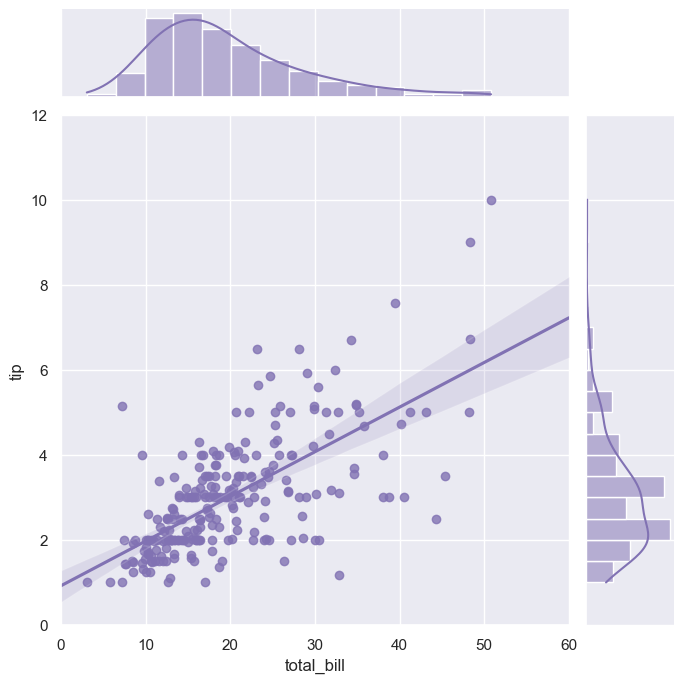

In [ ]:
sns.set_theme(style="darkgrid")
tips = pd.read_csv("seaborn-data/tips.csv")
display(tips.sample(10))
g = sns.jointplot(
        x="total_bill",     # x轴变量 - 账单总金额
        y="tip",            # y轴变量 - 小费金额
        data=tips,
        kind="reg",         # 绘制带有回归线的散点图
        truncate=False,     # 不截断回归线，让回归线延伸到整个x轴范围
        xlim=(0, 60), ylim=(0, 12),
        color="m",          # 使用洋红色（magenta）作为主色调
        height=7            # 设置图形高度为7英寸（控制整体大小）
    )

<Axes: xlabel='total_bill', ylabel='Probability'>

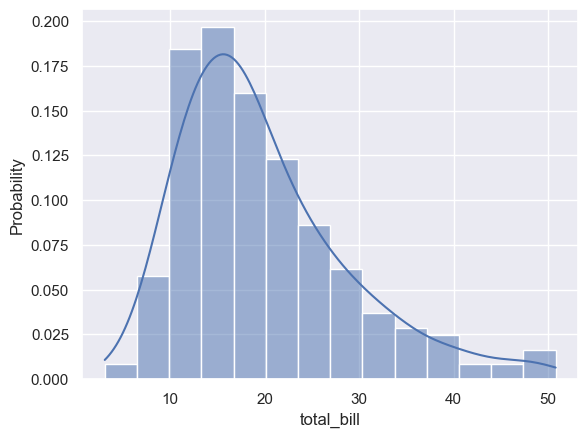

In [11]:
sns.histplot(data=tips,x='total_bill',stat='probability',kde=True)

<Axes: xlabel='Probability', ylabel='tip'>

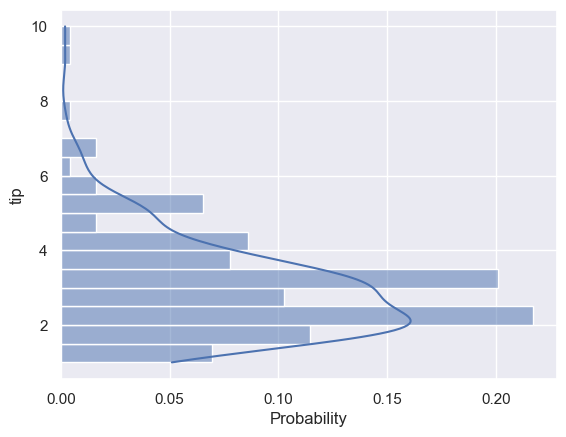

In [12]:
sns.histplot(data=tips,y='tip',stat='probability',kde=True)